<a href="https://colab.research.google.com/github/JayashreeMVignesh/machine-learning/blob/main/experiencelinearregmultivariateml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In exercise folder (same level as this notebook on github) there is hiring.csv.

https://raw.githubusercontent.com/Rhevathi/DATA-SCIENCE/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

2 yr experience, 9 test score, 6 interview score

12 yr experience, 10 test score, 10 interview score

In [18]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/Rhevathi/DATA-SCIENCE/master/ML/2_linear_reg_multivariate/Exercise/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 384.0+ bytes


In [21]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [22]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


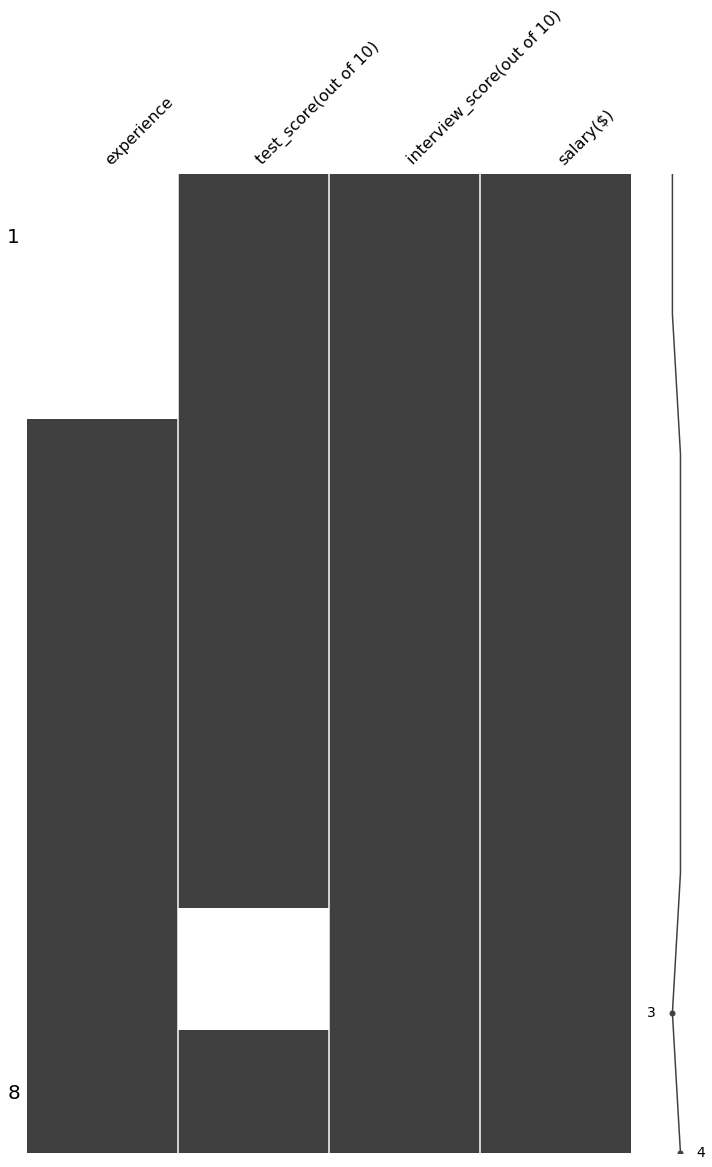

In [23]:
#to visualize missing value
import missingno as msno
msno.matrix(df,figsize=(12,18))

In [24]:
df.dtypes

experience                     object
test_score(out of 10)         float64
interview_score(out of 10)      int64
salary($)                       int64
dtype: object

In [25]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [28]:
df.fillna("zero")

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,zero,7,72000
7,eleven,7.0,8,80000


In [29]:
pip install word2number 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=3f52e58f9d9a9ff15eecd5cb067dc148d782cc40a08a1a76e9b03d3bf11a2efc
  Stored in directory: /root/.cache/pip/wheels/cb/f3/5a/d88198fdeb46781ddd7e7f2653061af83e7adb2a076d8886d6
Successfully built word2number


In [30]:
from word2number import w2n
import math

In [32]:
df.experience = df.experience.fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [33]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [34]:
#to perform imputation -if delete not producing proper result
#strategy as mean
from sklearn.impute import SimpleImputer
df=df.copy()
impute=SimpleImputer(strategy='mean')
df.iloc[:,:]=impute.fit_transform(df)
#iloc=i locate 
#:,:=all rows and all columns


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  8 non-null      float64
 1   test_score(out of 10)       8 non-null      float64
 2   interview_score(out of 10)  8 non-null      float64
 3   salary($)                   8 non-null      float64
dtypes: float64(4)
memory usage: 384.0 bytes


In [36]:
# Create linear regression object
reg = linear_model.LinearRegression()


In [38]:
x=df.drop(['salary($)'],axis=1)#independent variable
y=df['salary($)']#dependent variable,continuous variable

In [39]:
reg.fit(x,y)

LinearRegression()

In [40]:
reg.predict([[2, 9, 6]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53290.89255945])

In [41]:
reg.predict([[12, 10, 10]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92268.07227784])